### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [Initial observations](#section306)<br/>
    - 3.7 [Final observations](#section307)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Working on column mileage](#section401)<br/>
    - 4.2 [Removing duplicate rows](#section402)<br/>
    - 4.3 [Missing data and its imputation](#section403)<br/>
    - 4.4 [Treating outliers](#section404)<br/>
    - 4.5 [Treating zeros in price](#section405)<br/>
    - 4.6 [Replacing 'other' in body](#section406)<br/>
    - 4.7 [Working on column - car](#section407)<br/>
    - 4.8 [Binning year and price column](#section408)<br/>
- 5. [Identify patterns in the data](#section5)</br>        
    - 5.1 [Sales of top 10 car brands](#section501)</br>  
    - 5.2 [No of registered cars](#section502)</br>
    - 5.3 [Types of car engines based on fuel](#section503)</br>
    - 5.4 [Type of car](#section504)</br>
    - 5.5 [Registration vs Engine type](#section505)</br>
    - 5.6 [Car type vs engine type](#section506)</br>
    - 5.7 [Registration vs car type](#section507)</br>
    - 5.8 [Distribution of Engine Power of Cars](#section508)</br>
    - 5.9 [Body wise count](#section509)</br>
- 6. [Analysis through questions](#section6)</br>
    - 6.1 [What is the ratio of car bodies among top 10 car brands?](#section601)</br>  
    - 6.2 [Is it a full, rear or front drive car according to body of the car?](#section602)</br>
    - 6.3 [How the no of registration changing over the years?](#section603)</br>
    - 6.4 [Is power of engine changing with time?](#section604)</br>
    - 6.5 [How is the sales trend of cars according to engine type over the years?](#section605)</br>
- 7. [Conclusion](#section7)</br>
    
        
        
        

<a id=section1></a>
## 1. Problem Statement 
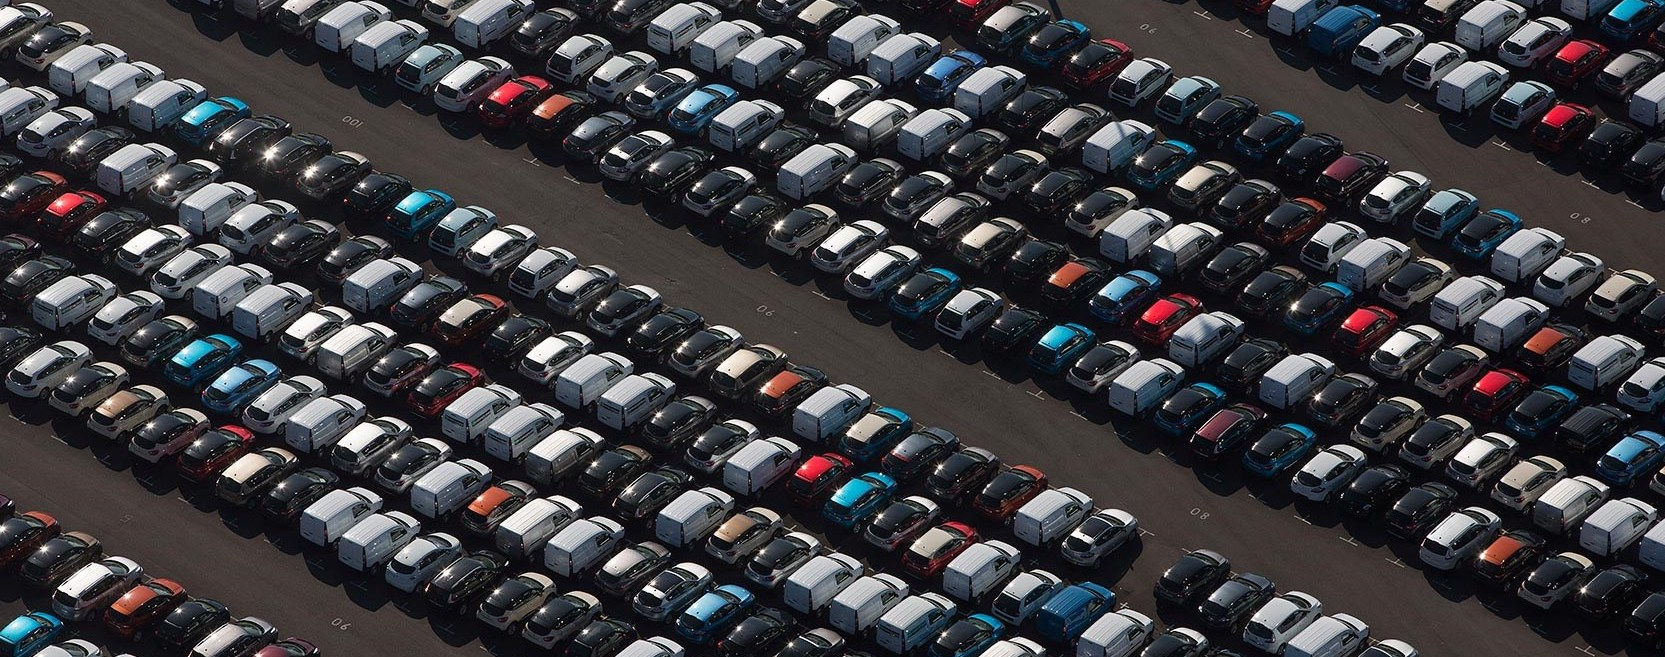

"This is a 2016 dataset which studies __car sales in Ukraine over 5 decades__ by working on car features"
<a id=section101></a> 
### 1.1 Introduction
This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis.

<a id=section102></a>
### 1.2 Data Source and Dataset

__a__. How was it collected? 

- __Name__: "Car Sales Dataset"
- __Year__: 2016
- __Description__: "This data has around 9K entries to study and evaluate the car sales in Ukrain. The data contains information regarding many aspects related to car features for various car manufacturers."

__b__. Is it a sample? If yes, was it properly sampled?
- It's a subset collected. We don't have official information about the data collection method, but it appears *not* to be a random sample, so we can assume that it is not representative.











<a id=section2></a> 
## 2. Load the packages and data 

In [52]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

car_sales = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv", encoding = "ISO-8859-1")


<a id=section3></a> 
## 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

In [7]:
car_sales.dtypes       # Display the data type for each variable

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

In [9]:
car_sales.head()                                                                       # Display the first five rows of the data set

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [10]:
car_sales.describe(include = 'all')                                                    # Descriptive statistics for the numerical variables                                                  

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


#### Observations

Above table gives us the description of the dataset. If you observe, in the mileage column, minimum value is 0 and maximumm is 999 which cannot be the case. Also in the engV column we have maximum value as 99.99 (100 litres) which seems quite out of range for a car of past or present time. So we have take care of these outliers. We will clean the data in section below.

In [11]:
car_sales.sample(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive
2799,Land Rover,21000.00,crossover,136,2.2,Diesel,yes,2010,Freelander,full
2626,Toyota,8800.00,sedan,165,1.8,Petrol,yes,2007,Avensis,front
5954,Chevrolet,6100.00,sedan,162,1.6,Gas,yes,2008,Lacetti,front
3403,Geely,5200.00,sedan,41,1.5,Petrol,yes,2012,MK,front
6676,Toyota,22500.00,sedan,12,2.5,Petrol,yes,2014,Camry,front
97,Volkswagen,0.00,van,165,2.0,Diesel,yes,2013,T5 (Transporter) ãðóç,front
3272,Opel,8000.00,van,200,1.9,Diesel,yes,2003,Vivaro ãðóç.,front
1939,Mitsubishi,9800.00,crossover,92,2.0,Petrol,yes,2008,Outlander,full
4130,ZAZ,407.55,hatch,143,0.9,Petrol,yes,1994,1102 Òàâðèÿ,NaN
9517,Hyundai,9100.00,crossover,170,2.0,Petrol,yes,2007,Tucson,full


In [12]:
import pandas_profiling                                                                   
profile = pandas_profiling.ProfileReport(car_sales)
profile.to_file(outputfile="csoutputfile.html")                              

<a id=section306></a> 
### 3.6. Initial observations through pandas_profiling:
- Summary of data types in this dataset:
 - <em>Numeric</em>: price (Float), mileage (Integer), engV (Float), year (Integer)
 - <em>Object</em>: car, body, engType, registration, model, drive

- <strong>car</strong>, <strong>model</strong> has 87 and 888 distinct values respectively. Need to find a way to reduce the distinct count
- <strong>mileage</strong>, <strong>price</strong> has 348 and 267 values as zero respectively
- The following variables have null values:
    - <strong>drive</strong> has 511 missing values
    - <strong>engV</strong> has 434 missing values
- <em>Dataset</em> has 113 duplicate rows
- <em>body</em> and <em>engType</em> has entries of 'other' and 'Other' respectively. These values are read as regular vlaues but are obviously missing values. Need to find a way to replace these values with something appropriate


### Let us  check the count of 'other' and 'Other' in <em>body</em> and <em>engType</em>

In [13]:
print("engType has {} entries of 'Other'".format(len(car_sales[car_sales['engType'] == 'Other'])))

print("body has {} entries of 'other'".format(len(car_sales[car_sales['body'] == 'other'])))

engType has 462 entries of 'Other'
body has 838 entries of 'other'


### Let us now check the no of duplicate rows

In [14]:
car_sales.loc[car_sales.duplicated(keep=False), : ]
len(car_sales.loc[car_sales.duplicated(keep=False), : ])

201

### No of distinct values

In [15]:
print("Count of distinct entries for car:", len(set(car_sales['car'])))     
print("Distinct entries for car:", set(car_sales['car']))  
 

Count of distinct entries for car: 87
Distinct entries for car: {'Chrysler', 'Chevrolet', 'ËUAZ', 'JAC', 'Land Rover', 'Tesla', 'Mercedes-Benz', 'Lifan', 'Alfa Romeo', 'Jeep', 'Huanghai', 'Geely', 'Fisker', 'Peugeot', 'VAZ', 'Wartburg', 'Dodge', 'Saab', 'Renault', 'Buick', 'Citroen', 'Volkswagen', 'Infiniti', 'Lamborghini', 'Lancia', 'Ferrari', 'Volvo', 'BYD', 'Dadi', 'Aston Martin', 'Honda', 'Samsung', 'Daihatsu', 'BMW', 'Audi', 'Hyundai', 'Rover', 'Hummer', 'Bogdan', 'Lincoln', 'Aro', 'Moskvich-Izh', 'Maserati', 'Porsche', 'Smart', 'Samand', 'Nissan', 'SMA', 'Great Wall', 'MG', 'GAZ', 'Chery', 'Other-Retro', 'Toyota', 'Isuzu', 'Suzuki', 'Ford', 'Kia', 'Skoda', 'MINI', 'Opel', 'Rolls-Royce', 'Mazda', 'Cadillac', 'GMC', 'SsangYong', 'Daewoo', 'Dacia', 'Acura', 'Changan', 'ZAZ', 'Mercury', 'FAW', 'ZX', 'Jaguar', 'Groz', 'Subaru', 'Seat', 'Hafei', 'Bentley', 'UAZ', 'Lexus', 'TATA', 'Moskvich-AZLK', 'Mitsubishi', 'Barkas', 'Fiat'}


In [16]:
print("Count of distinct entries for model:", len(set(car_sales['model'])))     
#print("Distinct entries for model:", set(car_sales['model']))                       # Its a large set of data, will use when required

Count of distinct entries for model: 888


<a id=section307></a> 
### 3.7. Final observations 

- Variables to transform prior to analysis:
 - __car__: car has a significant no of disinct values. We will group this data
 - __price__: Zeros to be replaced by mean
 - __body__  : 'other' to be replaced 
 - __mileage__: mileage need to be addressed 
 - __engV__: Replacing outliers in this case with mode. engV above 10 litres will be treated as outliers
 - __engType__ : 'Other' to be treated as NaN and should be dropped as per data source info
 - __year__: we need to bin for better understanding
 - __model__: To decide whether to keep or delete the __model__ column as the no of distinct values are 888
 - __drive__: To spot and drop NaN
 - NaN values also to be handled 
 - Duplicate rows to be handled

<a id=section4></a> 
### 4. Data Normalization

<a id=section401></a> 
### 4.1. Working on column mileage
        Using mileage we create a new column for used and new cars

In [17]:
def filter_car(mileage):
    if mileage == 0:
        return 'New'
    else:
        return 'Used'

In [18]:
car_sales['car_Type'] = car_sales['mileage'].apply(filter_car)

In [19]:
car_sales.sample(5)

,car,price,body,mileage,engV,engType,registration,year,model,drive,car_Type
6124,Volkswagen,6900.0,crossover,258,2.5,Diesel,no,2004,Touareg,full,Used
4805,Renault,3300.0,van,345,1.9,Diesel,yes,2001,Kangoo ãðóç.,front,Used
6697,Mercedes-Benz,15000.0,sedan,240,5.0,Petrol,yes,2004,S 500,full,Used
485,Volkswagen,19000.0,sedan,109,1.8,Petrol,yes,2012,Passat B7,front,Used
6501,Audi,30999.0,sedan,2,1.4,Petrol,yes,2016,A3,front,Used


<a id=section402></a> 
### 4.2 Removing duplicate rows

In [20]:
print('The dimension of the car_sales dataframe is {}'.format(car_sales.shape))
print('The no of duplicate rows are {}'.format(len(car_sales.loc[car_sales.duplicated(keep=False), :])))

The dimension of the car_sales dataframe is (9576, 11)
The no of duplicate rows are 201


In [21]:
print('The shape of the car_sales dataframe after removing duplicate rows is {}'.format(car_sales.drop_duplicates(keep=False).shape))

The shape of the car_sales dataframe after removing duplicate rows is (9375, 11)


<a id=section403></a> 
### 4.3 Missing data and its imputation
   ####          Dropping NaN values 

In [22]:
car_sales.dropna(axis=0, subset=['drive'], inplace=True)

In [23]:
car_sales['engType'].replace('Other', np.nan, inplace=True)

In [24]:
car_sales.dropna(axis=0, subset=['engType'], inplace=True)

In [25]:
car_sales.sample(4)

,car,price,body,mileage,engV,engType,registration,year,model,drive,car_Type
8631,Mercedes-Benz,189999.0,other,0,4.7,Petrol,yes,2016,S 500,full,New
4673,Peugeot,6199.0,vagon,250,1.6,Petrol,yes,2003,307,front,Used
1646,ZAZ,2499.0,sedan,45,1.2,Gas,yes,2007,1103 Ñëàâóòà,front,Used
689,Nissan,11800.0,crossover,140,2.0,Petrol,yes,2009,Qashqai,full,Used


<a id=section404></a> 
### 4.4 Treating outliers

In [26]:
def correct_engV(engV):
    if engV >= 10:                                #Creating a fucntion which replaces all the engV values >10 to NaN
        return np.nan                            
    else:
        return engV

In [27]:
car_sales['engV'] = car_sales['engV'].apply(correct_engV)        #The engV(Engine Power/Displacement)

In [28]:
car_sales.sample(5)

,car,price,body,mileage,engV,engType,registration,year,model,drive,car_Type
6373,Mazda,2950.0,hatch,220,2.0,Petrol,yes,1993,626,front,Used
5942,Mercedes-Benz,30000.0,other,176,5.5,Petrol,yes,2003,E-Class,rear,Used
5372,Nissan,17500.0,crossover,45,2.0,Petrol,yes,2012,Qashqai,full,Used
8221,BMW,15000.0,crossover,85,4.8,Petrol,no,2010,X5,full,Used
6225,Mercedes-Benz,8700.0,sedan,240,2.2,Diesel,yes,2000,E-Class,rear,Used


In [29]:
car_sales['engV'].isnull().sum()                                   #checking the no of NaN values

265

In [30]:
mean_value = car_sales['engV'].mean()                              #this will replace all NaN values with the mean of the non null values
car_sales['eng_power'] = car_sales['engV'].fillna(mean_value)      #creating a new column named eng_power

In [31]:
car_sales.drop(['engV'], axis=1, inplace = True)
car_sales.head()

,car,price,body,mileage,engType,registration,year,model,drive,car_Type,eng_power
0,Ford,15500.0,crossover,68,Gas,yes,2010,Kuga,full,Used,2.5
1,Mercedes-Benz,20500.0,sedan,173,Gas,yes,2011,E-Class,rear,Used,1.8
2,Mercedes-Benz,35000.0,other,135,Petrol,yes,2008,CL 550,rear,Used,5.5
3,Mercedes-Benz,17800.0,van,162,Diesel,yes,2012,B 180,front,Used,1.8
5,Nissan,16600.0,crossover,83,Petrol,yes,2013,X-Trail,full,Used,2.0


<a id=section405></a> 
### 4.5 Treating zeros in price

In [32]:
car_sales.loc[car_sales['price'] == 0, 'price'] = np.nan            #replacing zeros with NaN

In [33]:
mean_price = car_sales['price'].mean()                              #this will replace all NaN values with the mean of the non null values
car_sales['price'] = car_sales['price'].fillna(mean_price)

In [34]:
car_sales['price'].isin([0]).sum()                                  #all zeros replaced with mean in price column

0

<a id=section406></a> 
### 4.6 Replacing 'other' in body

In [35]:
car_sales["body"].replace("other", np.nan, inplace=True)                   #replacing 'other' with NaN

In [36]:
car_sales['body'].isnull().sum()

721

In [37]:
car_types = {'Aston Martin':'sedan','UAZ':'hatch','Cadillac':'hatch','ËUAZ':'hatch','FAW':'hatch','Moskvich-AZLK':'hatch','GMC':'crossover','Acura':'hatch','BYD':'hatch','Rover':'crossover','Lancia':'hatch','Audi':'sedan','BMW':'crossover','Saab':'hatch','Great Wall':'hatch','Bentley':'sedan','Chery':'hatch','Chevrolet':'sedan','Chrysler':'sedan','Groz':'hatch','Citroen':'van','Dacia':'sedan','Mercury':'hatch','Lifan':'hatch','ZX':'hatch','Dadi':'crossover','Dodge':'sedan','Mercedes-Benz':'sedan','Ferrari':'sedan','Fiat':'sedan','Ford':'hatch','GAZ':'sedan','Geely':'sedan','Honda':'sedan','Hummer':'crossover','Hyundai':'crossover','Smart':'hatch','Suzuki':'hatch','Alfa Romeo':'hatch','Infiniti':'crossover','Isuzu':'crossover','JAC':'crossover','Jaguar':'sedan','Jeep':'crossover','Kia':'sedan','Lamborghini':'sedan','Land Rover':'crossover','Lexus':'crossover','Lincoln':'crossover','MINI':'hatch','Maserati':'sedan','Mazda':'sedan','Mercedes-Benz':'sedan','Mitsubishi':'crossover','Moskvich-Izh':'van','Nissan':'crossover','Opel':'sedan','Peugeot':'van','Porsche':'crossover','Renault':'van','Rolls-Royce':'sedan','Seat':'hatch','Skoda':'sedan','Smart':'hatch','Subaru':'crossover','TATA':'hatch','Daewoo':'van','SsangYong':'crossover','Volvo':'crossover', 'Toyota':'crossover','VAZ':'sedan','Volkswagen':'van','ZAZ':'hatch'}


car_sales["body"].fillna(car_sales["car"].map(car_types), inplace=True)    #replacing 'other' in body with most frequently occuring body (mode) for that particular car
car_sales['body'].isnull().sum()                                           

0

<a id=section407></a> 
### 4.7 Working on column - car

In [38]:
top_10 = ['Volkswagen', 'Mercedes-Benz', 'BMW','Toyota', 'VAZ', 'Renault', 'Audi','Opel','Skoda','Bentley','Miscellaneous'] #creating a list of top 10 car brands based on data profiling of car column



In [39]:
car_sales['car_brands'] = pd.Categorical(car_sales['car'], categories=top_10).fillna('Miscellaneous') #creating top 10 categories
car_sales['car_brands'].unique()

[Miscellaneous, Mercedes-Benz, Renault, BMW, Volkswagen, ..., Toyota, Opel, Skoda, VAZ, Bentley]
Length: 11
Categories (11, object): [Miscellaneous, Mercedes-Benz, Renault, BMW, ..., Opel, Skoda, VAZ, Bentley]

In [40]:
car_sales.head()

,car,price,body,mileage,engType,registration,year,model,drive,car_Type,eng_power,car_brands
0,Ford,15500.0,crossover,68,Gas,yes,2010,Kuga,full,Used,2.5,Miscellaneous
1,Mercedes-Benz,20500.0,sedan,173,Gas,yes,2011,E-Class,rear,Used,1.8,Mercedes-Benz
2,Mercedes-Benz,35000.0,sedan,135,Petrol,yes,2008,CL 550,rear,Used,5.5,Mercedes-Benz
3,Mercedes-Benz,17800.0,van,162,Diesel,yes,2012,B 180,front,Used,1.8,Mercedes-Benz
5,Nissan,16600.0,crossover,83,Petrol,yes,2013,X-Trail,full,Used,2.0,Miscellaneous


<a id=section408></a> 
### 4.8 Binning year and price column

In [41]:
car_sales['year'].sort_values(ascending=True).unique()                  #checking unique values in year

array([1953, 1961, 1962, 1963, 1964, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [42]:
car_sales['year_Group'] = pd.cut(car_sales['year'],
                         [1953,1960,1970,1980,1990,2000,2010,2016],
                         labels=['1950s','1960s','1970s','1980s','1990s','2000s','2010s'], include_lowest=True)

In [43]:
car_sales.sample(2)

,car,price,body,mileage,engType,registration,year,model,drive,car_Type,eng_power,car_brands,year_Group
3223,Opel,3500.0,sedan,250,Diesel,yes,2001,Omega,rear,Used,2.2,Opel,2000s
2218,Mercedes-Benz,9500.0,van,248,Diesel,yes,2005,Vito ïàññ.,rear,Used,2.2,Mercedes-Benz,2000s


In [44]:
car_sales['price_group'] = pd.cut(car_sales['price'],
                         [0,5000,20000,50000,80000,110000,547800],
                         labels=['<5K', '5K-20K','20K-50K','50K-80K','80K-110K','>110K'], include_lowest=True)

In [45]:
car_sales.head(9)

,car,price,body,mileage,engType,registration,year,model,drive,car_Type,eng_power,car_brands,year_Group,price_group
0,Ford,15500.0,crossover,68,Gas,yes,2010,Kuga,full,Used,2.5,Miscellaneous,2000s,5K-20K
1,Mercedes-Benz,20500.0,sedan,173,Gas,yes,2011,E-Class,rear,Used,1.8,Mercedes-Benz,2010s,20K-50K
2,Mercedes-Benz,35000.0,sedan,135,Petrol,yes,2008,CL 550,rear,Used,5.5,Mercedes-Benz,2000s,20K-50K
3,Mercedes-Benz,17800.0,van,162,Diesel,yes,2012,B 180,front,Used,1.8,Mercedes-Benz,2010s,5K-20K
5,Nissan,16600.0,crossover,83,Petrol,yes,2013,X-Trail,full,Used,2.0,Miscellaneous,2010s,5K-20K
6,Honda,6500.0,sedan,199,Petrol,yes,2003,Accord,front,Used,2.0,Miscellaneous,2000s,5K-20K
7,Renault,10500.0,vagon,185,Diesel,yes,2011,Megane,front,Used,1.5,Renault,2010s,5K-20K
8,Mercedes-Benz,21500.0,sedan,146,Gas,yes,2012,E-Class,rear,Used,1.8,Mercedes-Benz,2010s,20K-50K
9,Mercedes-Benz,22700.0,sedan,125,Diesel,yes,2010,E-Class,rear,Used,2.2,Mercedes-Benz,2000s,20K-50K


#### Creating a copy of the transformed dataset

In [46]:
carsales_new = car_sales.copy(deep=True)

<a id=section5></a> 
## 5. Identify patterns in the data

<a id=section501></a> 
### 5.1 Sales of top 10 car brands

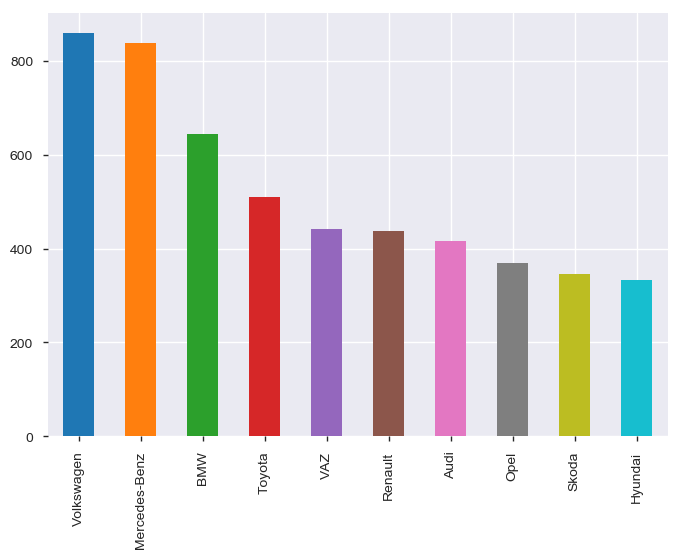

In [175]:
carsales_new['car'].value_counts().head(10).plot.bar()                        

#### Over the years Volkswagen remains top seller followed by Mecedes-Benz at second position and BMW at third.

<a id=section502></a>
### 5.2 No of registered cars

Text(0.5, 0, 'x - axis')

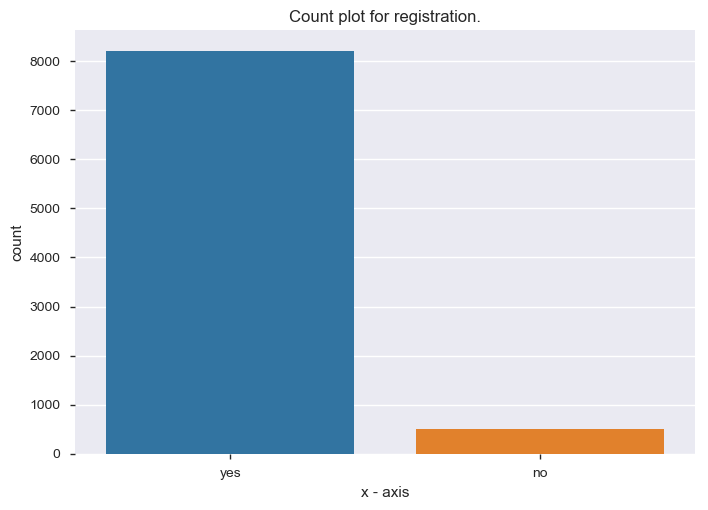

In [176]:
sns.countplot(x='registration', data=carsales_new).set_title('Count plot for registration.')
plt.xlabel('x - axis')

#### There should not be unregistered cars on the roads but there are a few

<a id=section503></a>
### 5.3 Types of car engines based on fuel

Text(0.5, 0, 'x - axis')

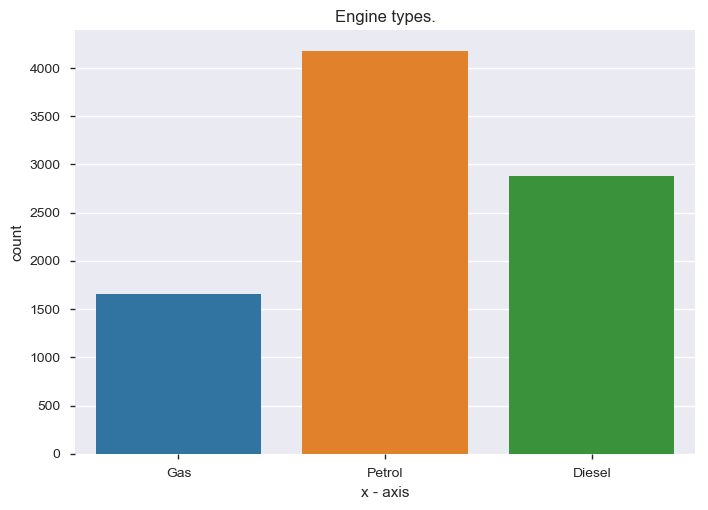

In [177]:
sns.countplot(x='engType', data=carsales_new).set_title('Engine types.')
plt.xlabel('x - axis')

#### There are more  petrol cars on the road followed by diesel and gas

<a id=section504></a>
### 5.4 Type of car

Text(0.5, 1.0, 'Type of cars')

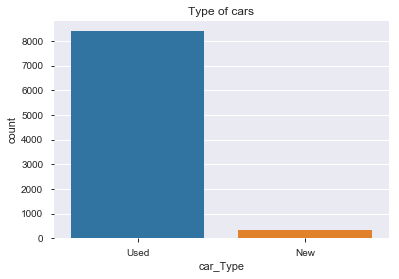

In [74]:
sns.countplot(x='car_Type', data=carsales_new).set_title('Type of cars')


#### Used cars are in  overwhelming numbers

<a id=section505></a>
### 5.5 Registration vs Engine type

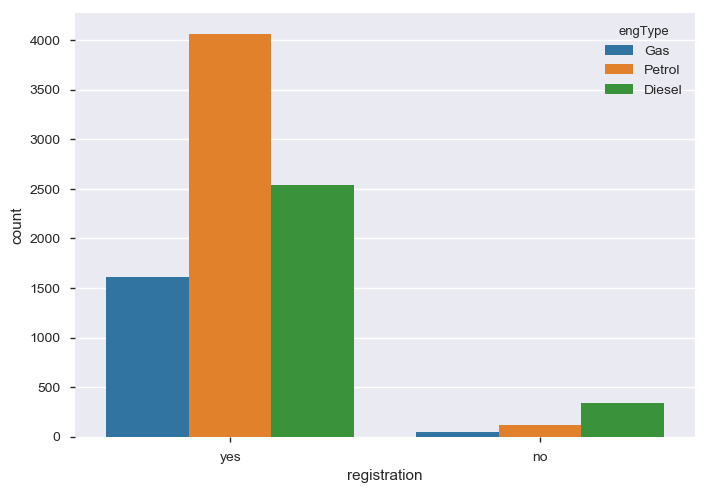

In [179]:
sns.countplot('registration',data=carsales_new, hue='engType')

#### This chart gives idea on how many Gas, Petrol and Diesel cars are registered and not registred. In registered cars, petrol cars tops the list and in unregistered  cars, diesel cars tops the list


<a id=section506></a>
### 5.6 Car type vs engine type

Text(0.5, 1.0, 'engType (Gas)')

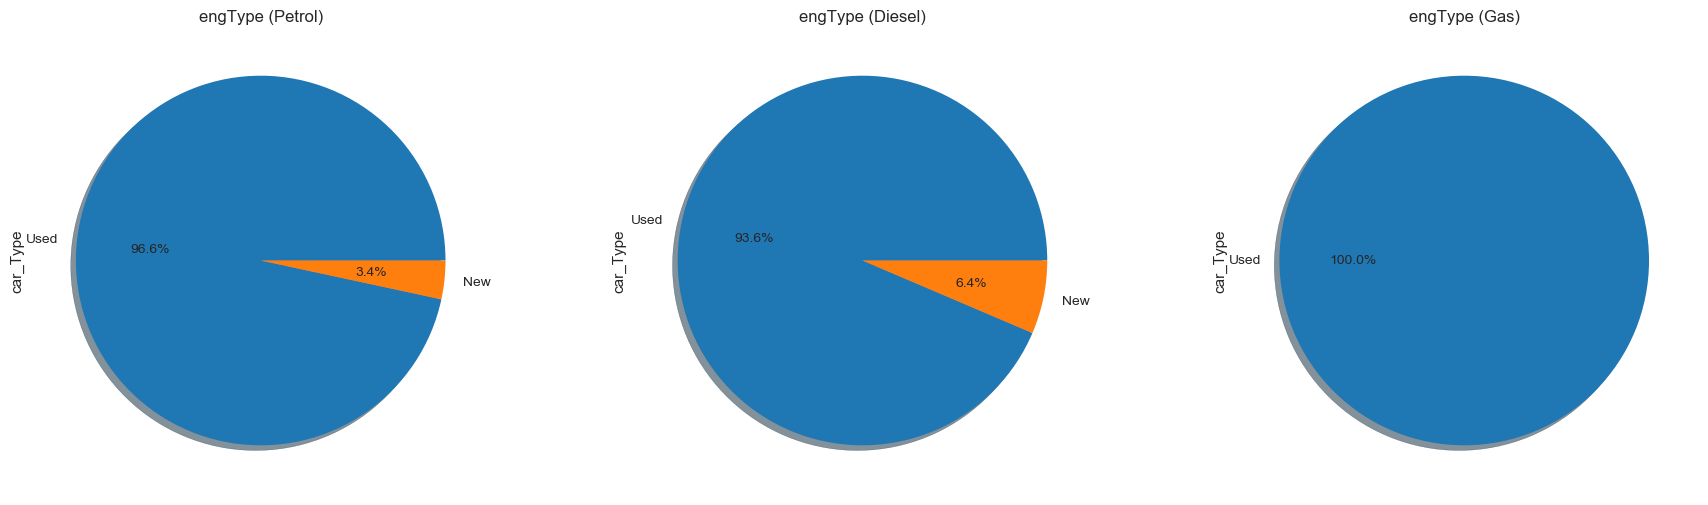

In [180]:
f,ax = plt.subplots(1,3,figsize=(22,6))
carsales_new['car_Type'][carsales_new['engType'] == 'Petrol'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0],shadow=True)
carsales_new['car_Type'][carsales_new['engType'] == 'Diesel'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[1],shadow=True)
carsales_new['car_Type'][carsales_new['engType'] == 'Gas'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('engType (Petrol)')
ax[1].set_title('engType (Diesel)')
ax[2].set_title('engType (Gas)')

#### Diesel engine cars have more new cars while Gas engie cars have all used cars

<a id=section507></a>
### 5.7 Registration vs car type

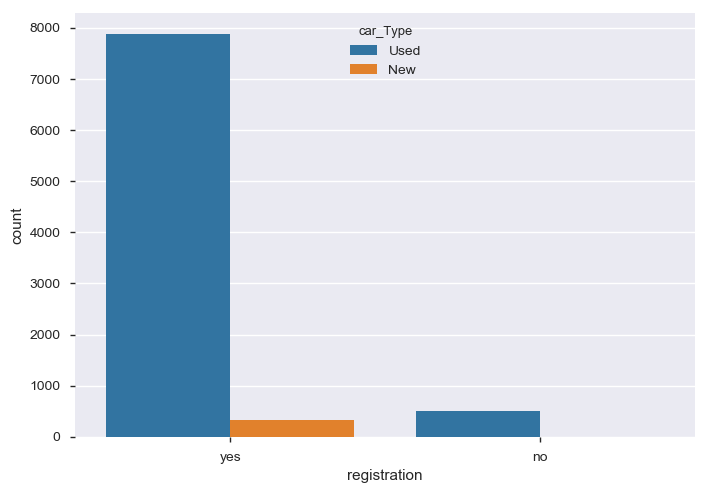

In [181]:
sns.countplot('registration',data=carsales_new, hue='car_Type')

<a id=section508></a>
### 5.8 Distribution of Engine Power of Cars

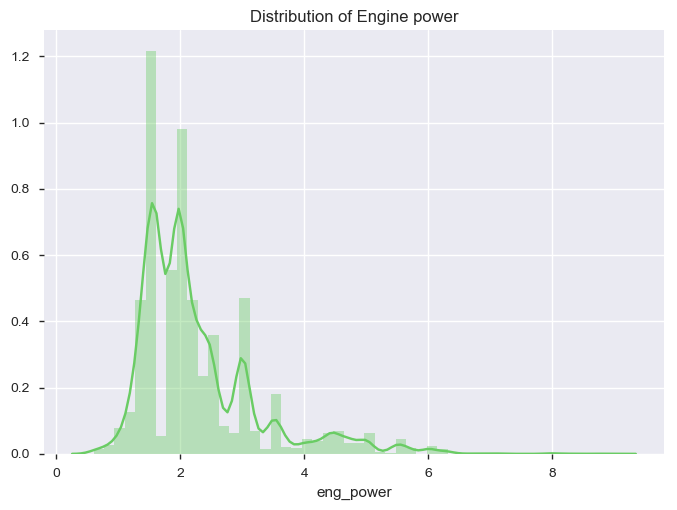

In [182]:
sns.distplot(carsales_new['eng_power'],color ='g')
plt.title('Distribution of Engine power')
plt.show()

   #### From the distribution above, it is observed that most car sales happen in the range of 1-3 Litres of engine

<a id=section509></a>
### 5.9 Segement wise count

Text(0.5, 0, 'Segment')

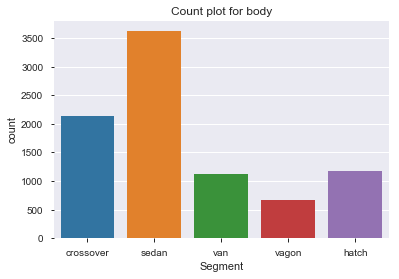

In [78]:
sns.countplot(x='body', data=carsales_new).set_title('Count plot for body')
plt.xlabel('Segment')

<a id=section6></a>
## 6. Analysis through questions

<a id=section601></a>
### 6.1 What is the ratio of car bodies among top 10 car brands?

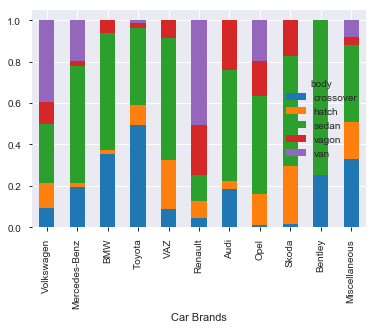

In [72]:
cross_tab = pd.crosstab( carsales_new.car_brands, carsales_new.body )
dummy = cross_tab.div(cross_tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Car Brands')

#### Observation 
With the help of this chart we can see that Volkswagen majorly sells __van__ in Ukrainian market whereas Mercedes-Benz sells __sedan__. Toyota majorly sells __crossover__ cars on the ukrainian roads and Skoda sells most __hatch__ cars


<a id=section602></a>
### 6.2 Is it a full, rear or front drive car according to body of the car?

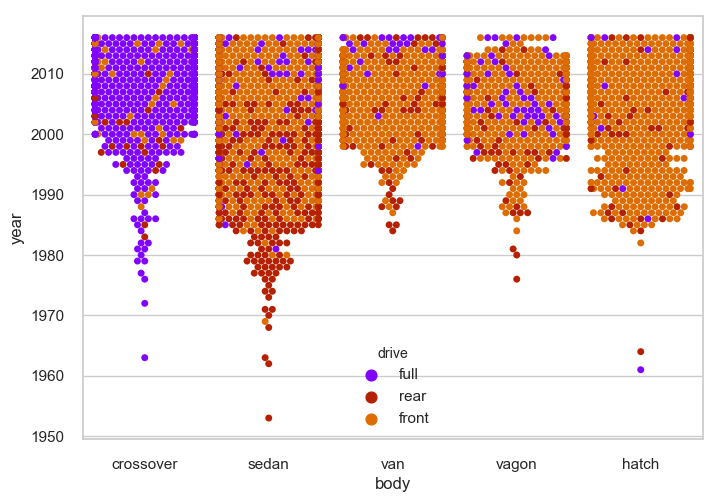

In [186]:
sns.set(style="whitegrid", palette="muted")
pd.melt(carsales_new, "body")                                                                  # "Melt" the dataset to "long-form" or "tidy" representation
sns.swarmplot(x="body", y="year", hue="drive", palette='gnuplot', data=carsales_new)           # Draw a categorical scatterplot to show each observation    
              

#### Obervation
 Looking at this plot it is clear that cars with __<em>crossover</em>__ body have full drive since the first crossover was sold in 1960s and also shows us the trend that how crossover sales have jumped in the begining of the 2000s. In __<em>sedan</em>__  initially rear drive cars were sold which changed to more no of front drive cars. Sedan and hatch cars are more popular.

<a id=section603></a>
### 6.3 How the no of registration changing over the years?

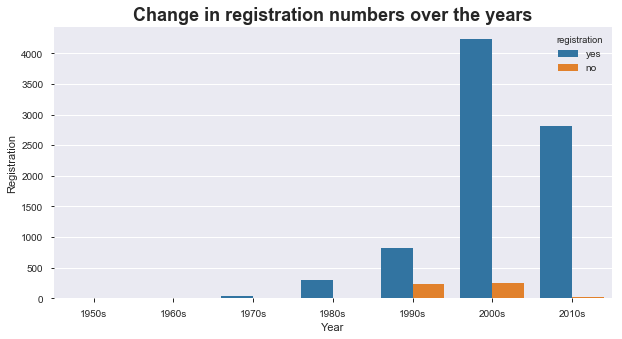

In [55]:
plt.figure(figsize=(10,5))
sns.countplot("year_Group", hue="registration", data=carsales_new)
plt.title("Change in registration numbers over the years",fontsize=18,fontweight="bold")
plt.ylabel("Registration")
plt.xlabel("Year")
plt.show()

#### Observation 
Over the no of years we can see the no of registrations increasing which also depicts the rise in sales of the cars


<a id=section604></a>
### 6.4 Is power of engine changing with time?


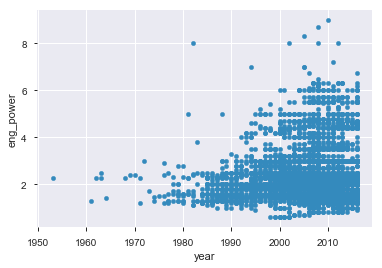

In [73]:
carsales_new.plot.scatter('year','eng_power')

#### Observation
This chart represents how people are moving towards cars with more power with changing time.  This chart also helps us understand that though there is an increase in the sales of high power engines, cars between 1 to 3 litres of engine remain popular

### 6.5 How is the sales trend of cars according to engine type over the years?

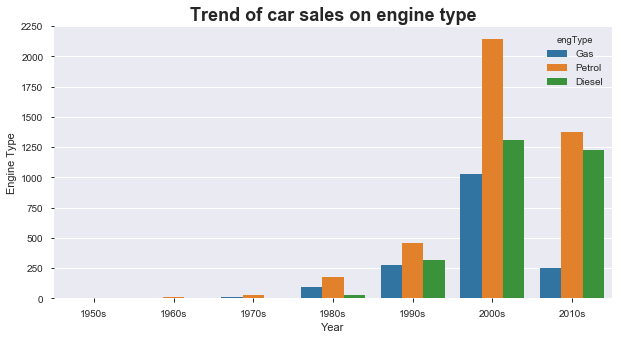

In [76]:
plt.figure(figsize=(10,5))
sns.countplot("year_Group", hue="engType", data=carsales_new)
plt.title("Trend of car sales on engine type",fontsize=18,fontweight="bold")
plt.ylabel("Engine Type")
plt.xlabel("Year")
plt.show()

#### Observation
Over the years Petrol cars dominate the market followed by Diesel cars. In 2010s Gas cars see a significant proportionate dip in sales

### 7. Conclusion

- This data has around 9K entries to study and evaluate the car sales in Ukrain. The data contains information regarding many aspects related to car features for various car manufacturers.(__From: Section 1.2__)
- Over the years Volkswagen remains top seller followed by Mecedes-Benz at second position and BMW at third. (__From: Section 5.1__)
- It is obssrved that mostly all cars in the dataset are used cars, very few being new.(__From: Section 5.4__)
- More new diesel engine cars, __6.4%__, are bought compared to petrol,__3.4%__, and gas cars being __100%__ used cars.(__From: Section 5.6__)
- We see that among Top 10 car brands, Volkswagen majorly sells __van__ in Ukrainian market whereas Mercedes-Benz sells __sedan__. Toyota majorly sells __crossover__ cars on the ukrainian roads and Skoda sells most __hatch__ cars(__From: Section 6.1__)
- It has also been observed that people are moving towards cars with more power with changing time. This also helps us understand that though there is an increase in the sales of high power engine cars, cars between 1 to 3 litres of engine remain popular(__From: Section 6.4__)
- From the analyis, it was concluded that Ukraine remains a big used car market and with sedan and crossover cars being popular choice. Petrol cars are sold the most followed by Diesel cars and followed by Gas cars, but only in the 2010s Gas cars see a proportionate dip in sales. Front drive cars are popular in all segments except in crossover which has full drive (__Collectively__)